# EDA
[Link do danych](https://www.kaggle.com/datasets/shubhamgoel27/dermnet)

About Dataset
Context
The data consists of images of 23 types of skin diseases taken from http://www.dermnet.com/dermatology-pictures-skin-disease-pictures. The total number of images are around 19,500, out of which approximately 15,500 have been split in the training set and the remaining in the test set.

Content
The images are in JPEG format, consisting of 3 channels, i.e. RGB. The resolutions vary from image to image, and from category to category, but overall these are not extremely high resolution imagery.

The categories include acne, melanoma, Eczema, Seborrheic Keratoses, Tinea Ringworm, Bullous disease, Poison Ivy, Psoriasis, Vascular Tumors, etc.

Acknowledgements
The images are taken from the public portal Dermnet (http://www.dermnet.com/) which is the largest dermatology source online built for the purpose of providing online medical education.

## Loading libraries

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import zipfile
import collections

## Loading the dataset

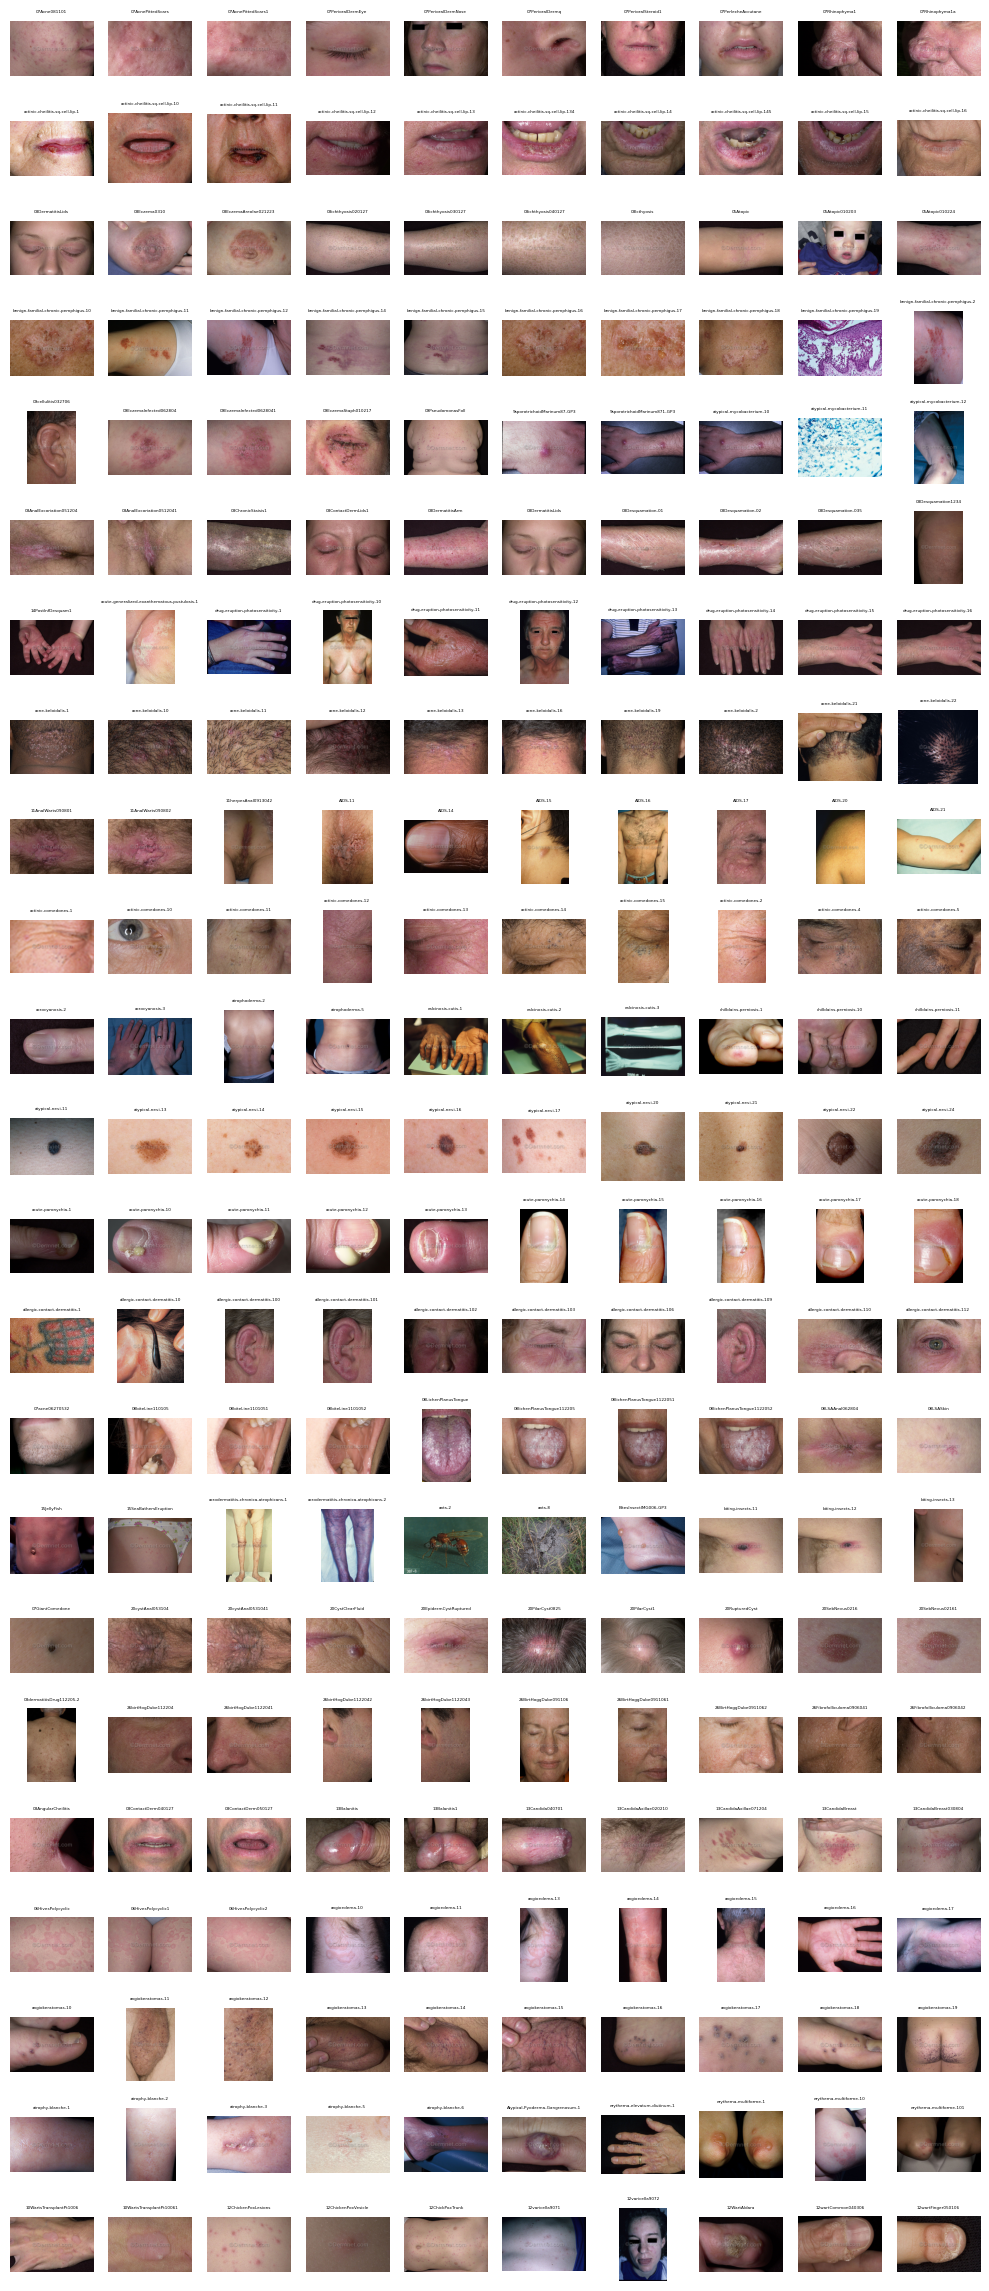

In [2]:
# Setting the path for dataest
dataset_path = '..//Data//train'

# Getting a list of all directories in dataest 
directories_in_dataest = os.listdir(dataset_path)

# Loading and displaying some of the images
directories = len(directories_in_dataest)
samples_from_direcotry = 10
fig, axes = plt.subplots(directories, samples_from_direcotry, figsize=(10, directories))

# Getting all image filenames from found directories
image_files = []
for i, directory in enumerate(directories_in_dataest[:directories]):
    for j, img_file in enumerate(os.listdir(f'{dataset_path}//{directory}')[:samples_from_direcotry]):
        image_files.append(img_file)
        image_path = f'{dataset_path}//{directory}'
        img = Image.open(os.path.join(image_path, img_file))
        axes[i][j].imshow(img)
        axes[i][j].set_title(img_file.split('.')[0])
        axes[i][j].title.set_size(3)
        axes[i][j].axis('off')
plt.tight_layout()
plt.show()

## Data analysis

### Searching for outliers

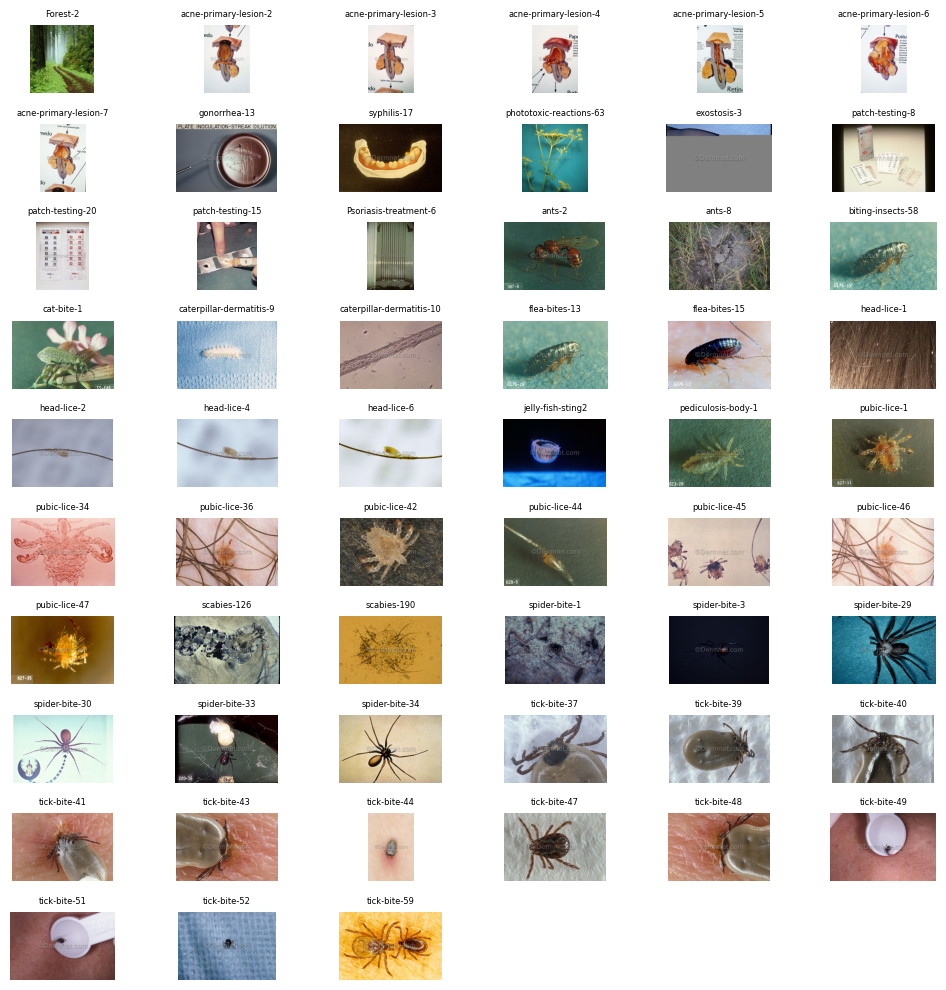

In [3]:
list_of_outliers = [
    # Acne and Rosacea Photos
    'Acne and Rosacea Photos//Forest-2.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-2.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-3.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-4.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-5.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-6.jpg',
    'Acne and Rosacea Photos//acne-primary-lesion-7.jpg',
    
    # Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
    
    # Atopic Dermatitis Photos
    
    # Bullous Disease Photos
    
    # Cellulitis Impetigo and other Bacterial Infections
    
    # Eczema Photos
    
    # Exanthems and Drug Eruptions
    
    # Hair Loss Photos Alopecia and other Hair Diseases
    
    # Herpes HPV and other STDs Photos
    'Herpes HPV and other STDs Photos//gonorrhea-13.jpg',
    'Herpes HPV and other STDs Photos//syphilis-17.jpg',
    
    # Light Diseases and Disorders of Pigmentation
    'Light Diseases and Disorders of Pigmentation//phototoxic-reactions-63.jpg',
    
    # Lupus and other Connective Tissue diseases
    
    # Melanoma Skin Cancer Nevi and Moles
    
    # Nail Fungus and other Nail Disease
    'Nail Fungus and other Nail Disease//exostosis-3.jpg',
    
    # Poison Ivy Photos and other Contact Dermatitis
    'Poison Ivy Photos and other Contact Dermatitis//patch-testing-8.jpg',
    'Poison Ivy Photos and other Contact Dermatitis//patch-testing-20.jpg',
    'Poison Ivy Photos and other Contact Dermatitis//patch-testing-15.jpg',
    
    # Psoriasis pictures Lichen Planus and related diseases
    'Psoriasis pictures Lichen Planus and related diseases//Psoriasis-treatment-6.jpg',
    
    # Scabies Lyme Disease and other Infestations and Bites
    'Scabies Lyme Disease and other Infestations and Bites//ants-2.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//ants-8.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//biting-insects-58.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//cat-bite-1.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//caterpillar-dermatitis-9.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//caterpillar-dermatitis-10.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//flea-bites-13.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//flea-bites-15.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//head-lice-1.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//head-lice-2.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//head-lice-4.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//head-lice-6.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//jelly-fish-sting2.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pediculosis-body-1.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-1.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-34.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-36.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-42.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-44.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-45.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-46.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//pubic-lice-47.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//scabies-126.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//scabies-190.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-1.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-3.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-29.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-30.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-33.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//spider-bite-34.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-37.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-39.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-40.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-41.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-43.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-44.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-47.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-48.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-49.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-51.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-52.jpg',
    'Scabies Lyme Disease and other Infestations and Bites//tick-bite-59.jpg'
    
    # Seborrheic Keratoses and other Benign Tumors
    
    # Systemic Disease
    
    # Tinea Ringworm Candidiasis and other Fungal Infections
    
    # Urticaria Hives
    
    # Vascular Tumors
    
    # Vasculitis Photos
    
    # Warts Molluscum and other Viral Infections
]

n_rows = 10
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows))
r=0
c=0
for i, outlier in enumerate(list_of_outliers):
    img = Image.open(f'{dataset_path}//{outlier}')
    axes[r][c].imshow(img)
    axes[r][c].set_title(outlier.split('//')[-1].split('.')[0])
    axes[r][c].title.set_size(6)
    axes[r][c].axis('off')
    if (i+1) % n_cols == 0:
        r+=1
        c=-1
    c+=1
for i in range(3, n_cols):
    fig.delaxes(axes[n_rows-1][i])
plt.tight_layout()
plt.show()

### Image dimension analysis

Widths countsCounter({720: 21574, 480: 598, 473: 161, 490: 115, 482: 115, 476: 115, 464: 92, 472: 92, 478: 92, 467: 92, 489: 92, 484: 92, 494: 69, 491: 69, 474: 69, 465: 69, 492: 69, 485: 69, 483: 69, 468: 69, 601: 69, 479: 69, 475: 69, 495: 46, 469: 46, 471: 46, 498: 46, 486: 46, 611: 46, 470: 46, 597: 23, 687: 23, 481: 23, 604: 23, 619: 23, 677: 23, 685: 23, 690: 23, 599: 23, 584: 23, 582: 23, 519: 23, 487: 23, 509: 23, 488: 23, 496: 23, 602: 23, 638: 23, 609: 23, 683: 23, 650: 23, 633: 23, 596: 23, 503: 23, 540: 23, 454: 23, 557: 23, 565: 23, 592: 23})
Heights countsCounter({472: 6279, 720: 3404, 480: 1495, 474: 989, 477: 966, 475: 575, 469: 552, 471: 529, 468: 529, 470: 506, 482: 506, 481: 460, 476: 437, 485: 414, 464: 391, 479: 391, 487: 391, 478: 391, 473: 368, 490: 345, 484: 322, 488: 253, 483: 230, 466: 230, 491: 207, 486: 184, 489: 184, 467: 184, 493: 161, 465: 161, 495: 115, 596: 115, 460: 115, 463: 92, 594: 92, 494: 92, 598: 92, 499: 69, 500: 69, 599: 69, 588: 69, 609: 69, 5

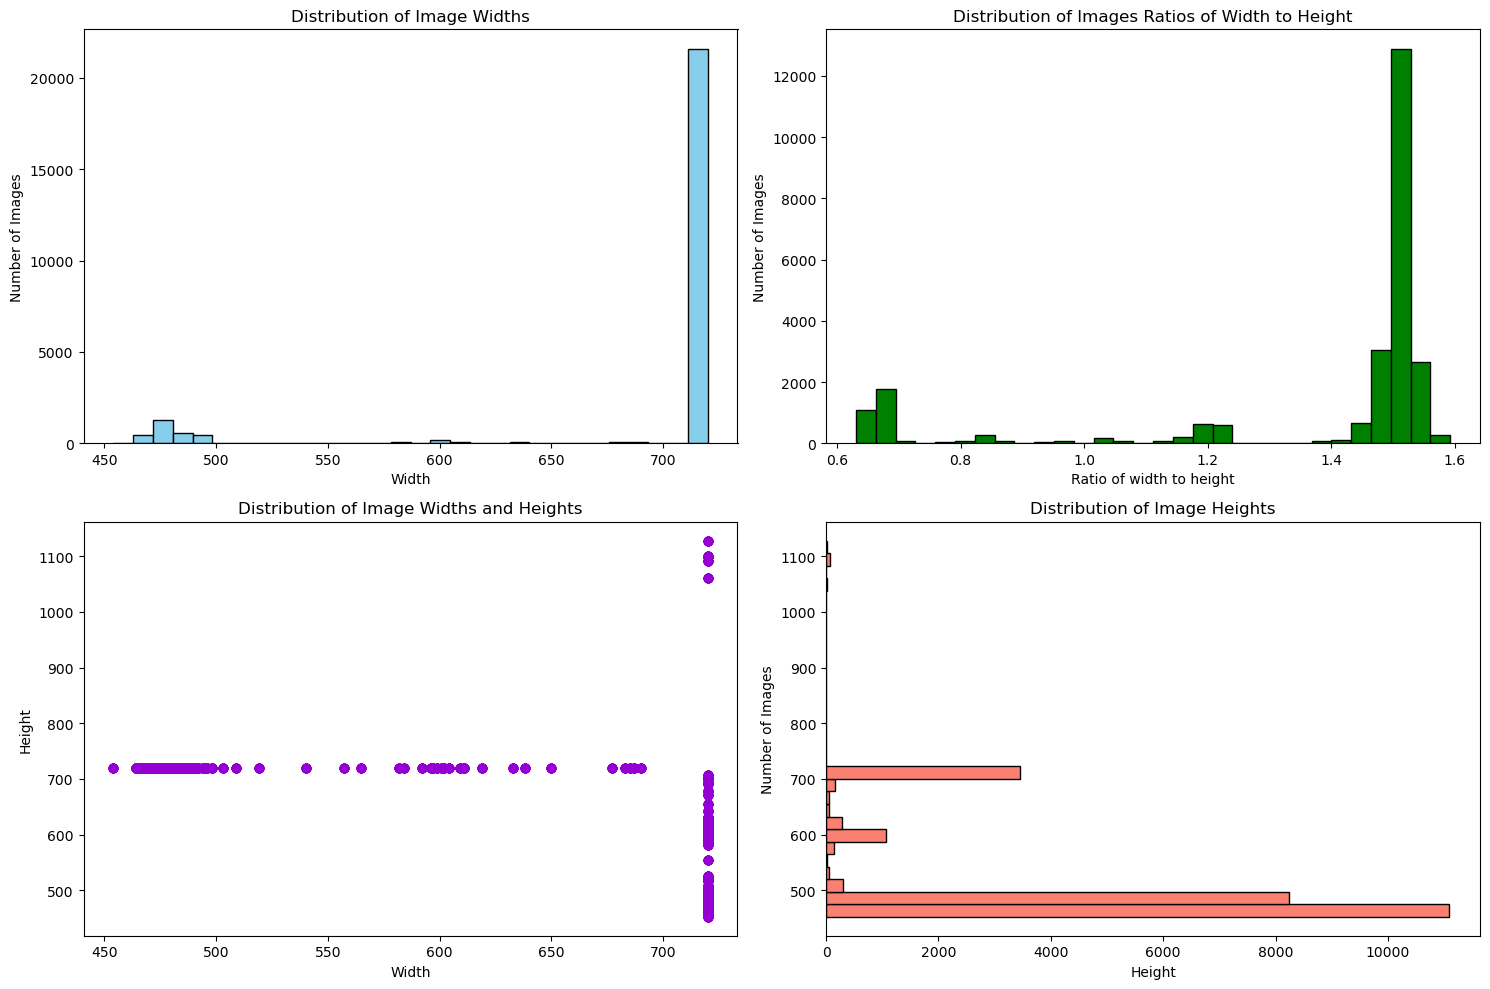

In [4]:
# Extracting dimensions (width and height) of all images
image_dimensions = [Image.open(os.path.join(image_path, img_file)).size 
                    for img_file in os.listdir(f'{dataset_path}//{directory}')
                    for directory in directories_in_dataest]

# Separating widths and heights
widths, heights = zip(*image_dimensions)



def plot_dimensions_distributions(widths, heights):
    
    # Getting sorted counts of each width and length
    widths_counter = collections.Counter(widths)
    print(f'Widths counts{widths_counter}')
    heights_counter = collections.Counter(heights)
    print(f'Heights counts{heights_counter}')

    # Plotting distribution of widths and heights
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))

    # Plotting widths
    ax[0][0].hist(widths, bins=30, color='skyblue', edgecolor='black')
    ax[0][0].set_title('Distribution of Image Widths')
    ax[0][0].set_xlabel('Width')
    ax[0][0].set_ylabel('Number of Images')

    # Plotting ratios of widths to heights
    ratio = [widths[i]/heights[i] for i in range(len(image_dimensions))]
    print(f'Mean of ratios of width to height: {np.mean(ratio)}')
    ax[0][1].hist(ratio, bins=30, color='green', edgecolor='black')
    ax[0][1].set_title('Distribution of Images Ratios of Width to Height')
    ax[0][1].set_xlabel('Ratio of width to height')
    ax[0][1].set_ylabel('Number of Images')

    # Plotting widths and heights
    ax[1][0].scatter(widths, heights, color = 'darkviolet')
    ax[1][0].set_title('Distribution of Image Widths and Heights')
    ax[1][0].set_xlabel('Width')
    ax[1][0].set_ylabel('Height')

    # Plotting heights
    ax[1][1].hist(heights, bins=30, color='salmon', edgecolor='black', orientation='horizontal')
    ax[1][1].set_title('Distribution of Image Heights')
    ax[1][1].set_xlabel('Height')
    ax[1][1].set_ylabel('Number of Images')

    plt.tight_layout()
    plt.show()

plot_dimensions_distributions(widths, heights)

Widths countsCounter({720: 24863, 1101: 23, 1128: 23, 1098: 23, 1060: 23, 1092: 23})
Heights countsCounter({472: 6371, 480: 2093, 474: 1058, 477: 966, 475: 644, 482: 621, 468: 598, 469: 598, 471: 575, 476: 552, 470: 552, 473: 529, 464: 483, 485: 483, 478: 483, 481: 483, 490: 460, 479: 460, 487: 414, 484: 414, 483: 299, 488: 276, 491: 276, 489: 276, 467: 276, 486: 230, 465: 230, 466: 230, 495: 161, 494: 161, 493: 161, 596: 138, 460: 115, 720: 115, 463: 92, 597: 92, 594: 92, 599: 92, 492: 92, 609: 92, 601: 92, 598: 92, 611: 92, 499: 69, 500: 69, 498: 69, 588: 69, 507: 69, 605: 69, 586: 69, 496: 69, 589: 46, 693: 46, 607: 46, 690: 46, 497: 46, 604: 46, 619: 46, 592: 46, 608: 46, 678: 46, 606: 46, 459: 46, 591: 46, 582: 46, 587: 46, 461: 46, 643: 23, 687: 23, 625: 23, 707: 23, 521: 23, 505: 23, 677: 23, 685: 23, 626: 23, 624: 23, 593: 23, 603: 23, 595: 23, 525: 23, 642: 23, 457: 23, 590: 23, 613: 23, 631: 23, 618: 23, 584: 23, 600: 23, 701: 23, 615: 23, 628: 23, 519: 23, 516: 23, 509: 23, 

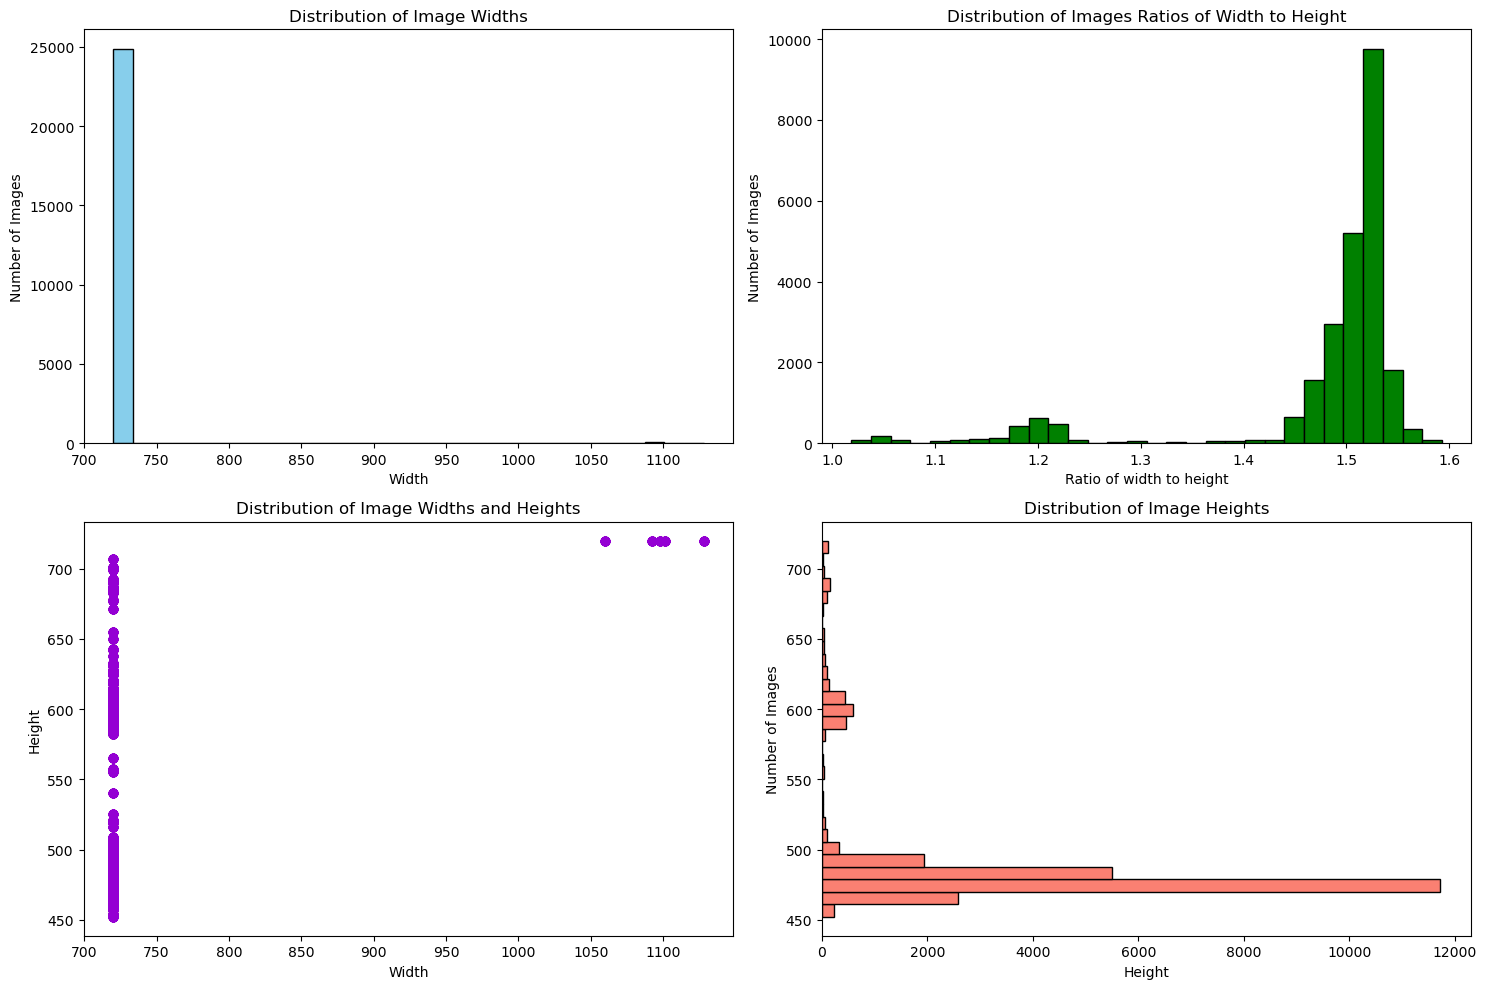

In [5]:
new_widths = [0] * len(image_dimensions)
new_heights = [0] * len(image_dimensions)
for i in range(len(image_dimensions)):
    if heights[i] > widths[i]:
        new_widths[i], new_heights[i] = heights[i], widths[i]
    else:
        new_heights[i], new_widths[i] = heights[i], widths[i]

plot_dimensions_distributions(new_widths, new_heights)

In [6]:
# colors, brightness

In [7]:
# ...

## Image correction and first preprocessing

### Handling outliers

In [8]:
# Code to get images excluding outliers

# Setting the path for dataest
dataset_path = '..//Data//train'

paths_to_images = dict()
outlier_images = [path.split('//')[-1] for path in list_of_outliers]

# Getting all image filenames from found directories excluding outliers
for directory in os.listdir(dataset_path):
    image_path = f'{dataset_path}//{directory}//'
    for img_file in os.listdir(f'{dataset_path}//{directory}'):
        if img_file not in outlier_images:
            if image_path in paths_to_images:
                paths_to_images[image_path].append(img_file)
            else:
                paths_to_images[image_path] = [img_file]       
# paths_to_images

### Changing size

In [9]:
# target_size=(194, 128)
target_size = (128, 128)
images = []
for key in paths_to_images:
    for value in paths_to_images[key]:
        img = Image.open(f'{key}{value}')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
# images

### Example of image preprocessing before and after

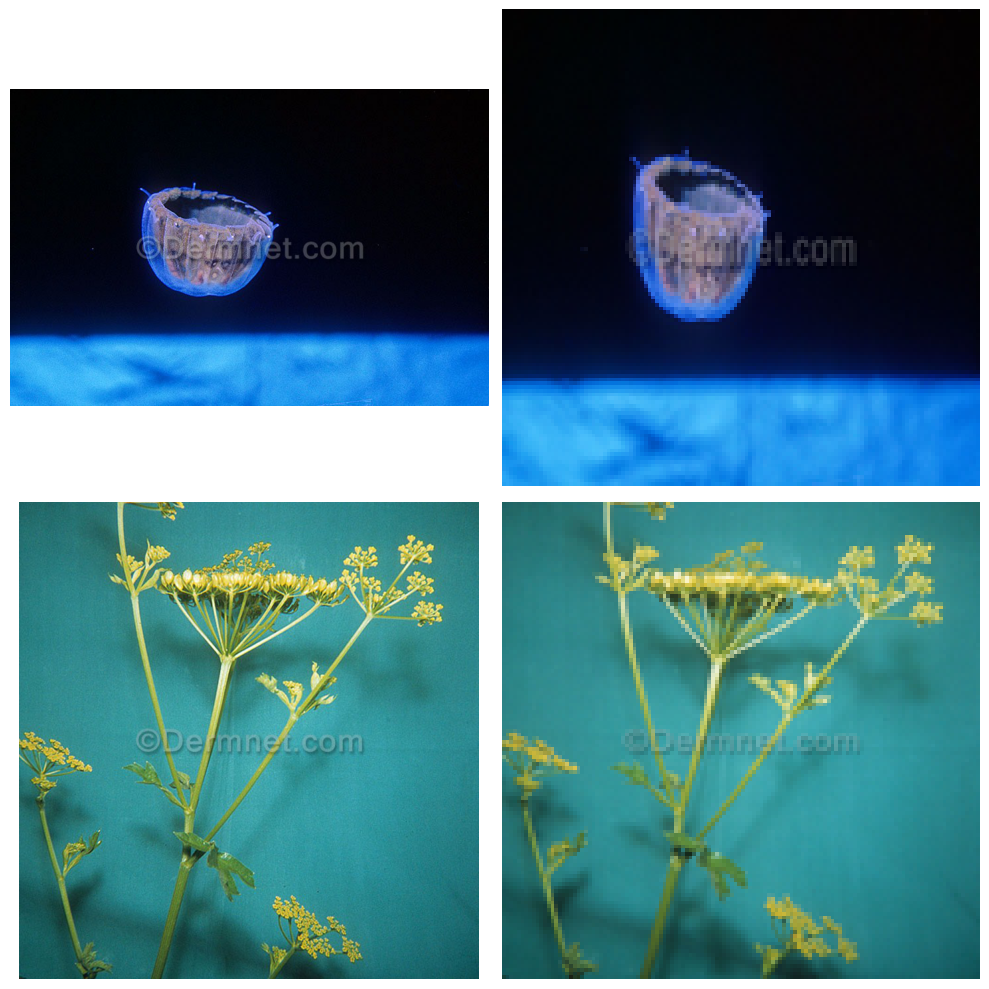

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

img = Image.open('..//Data//train//Scabies Lyme Disease and other Infestations and Bites//jelly-fish-sting2.jpg')     
axes[0][0].imshow(img)
axes[0][0].axis('off')
img = img.resize(target_size)
img = np.array(img) / 255.0
axes[0][1].imshow(img)
axes[0][1].axis('off')

img = Image.open('..//Data//train//Light Diseases and Disorders of Pigmentation//phototoxic-reactions-63.jpg')      
axes[1][0].imshow(img)
axes[1][0].axis('off')
img = img.resize(target_size)
img = np.array(img) / 255.0
axes[1][1].imshow(img)
axes[1][1].axis('off')

plt.tight_layout()
plt.show()

## Conclusions

- Our business objective is finding and distinguishing different skin diseases. Pictures that don't depict these illnesses are classified as outliers and are excluded form further usage. Sense the goal of the project is to create a model that distinguishes images, the outliers had to be found manually.
- Images have different sizes. 
- The sizes are mostly the same, but the irientation varies.
- There is no clear way of knowing, how an image sould be oriented, e.g. pictures of a thumb with a nail can be found pointing all four directions.
- Images aren't square, so it's neccesseary to resize them.
- ...